# Importação de bibliotecas

In [65]:
import pandas as pd
import numpy as np
from classifiers.bayesian_classifier import BayesianGaussianClassifier
from utils.synthetic_data_generator import SyntheticDatasetGenerator
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator

# Definição de constantes

In [66]:
np.random.seed(42)
CLASSIFIER_NAME = "Bayesian Gaussian"
TARGET_COLUMN_NAME = "y"
DATASET_NAME = "Synthetic"
TEST_SIZE = 0.3
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Construindo dataset sintético

In [67]:
features_patterns = {
    "pattern_1": {"pattern": np.array([[2, 2]]), "num_samples": 40, "y": 0},
    "pattern_2": {"pattern": np.array([[1, 3]]), "num_samples": 40, "y": 1},
    "pattern_3": {"pattern": np.array([[3, 3]]), "num_samples": 40, "y": 2},
}

generator = SyntheticDatasetGenerator()
synthetic_df = generator.generate_data(features_patterns)

In [68]:
synthetic_df

,x0,x1,y
0,2.226179,1.961529,0
1,1.734736,2.060455,0
2,1.740190,2.275729,0
3,1.891076,2.144999,0
4,2.050457,2.228562,0
...,...,...,...
115,2.835485,3.153556,2
116,2.796709,3.013272,2
117,3.131641,2.880166,2
118,2.714413,3.173068,2


In [69]:
list(synthetic_df[TARGET_COLUMN_NAME].unique())

[np.int64(0), np.int64(1), np.int64(2)]

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Bayesiano

In [70]:
bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=synthetic_df, n_indexes=HOLDOUT_INDEXES_NUMBER, test_size=TEST_SIZE
)

bayesian_accuracy_list = []

for train_indexes, test_indexes in bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=synthetic_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = BayesianGaussianClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

bayesian_df_results = pd.DataFrame(
    bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,1.0,0.0,"[25, 89, 80, 17, 65, 1, 102, 104, 81, 106, 3, 46, 107, 101, 21, 86, 90, 57, 35, 22, 20, 47, 116, 54, 84, 76, 61, 118, 103, 44, 64, 87, 27, 66, 34, 5, 60, 114, 41, 117, 77, 59, 91, 37, 28, 43, 12, 49, 111, 23, 51, 29, 63, 11, 19, 97, 75, 98, 18, 32, 69, 96, 45, 2, 7, 62, 110, 74, 48, 119, 73, 30, 39, 4, 92, 100, 95, 72, 14, 109, 40, 15, 9, 105]","[0, 6, 8, 10, 13, 16, 24, 26, 31, 33, 36, 38, 42, 50, 52, 53, 55, 56, 58, 67, 68, 70, 71, 78, 79, 82, 83, 85, 88, 93, 94, 99, 108, 112, 113, 115]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[12, 0, 0], [0, 13, 0], [0, 0, 11]]"
1,1.0,0.0,"[8, 40, 80, 118, 68, 32, 82, 79, 14, 22, 18, 100, 108, 27, 17, 1, 62, 43, 102, 93, 111, 61, 49, 60, 34, 99, 101, 72, 106, 89, 81, 47, 70, 56, 57, 12, 119, 21, 83, 94, 90, 13, 77, 4, 20, 11, 44, 42, 69, 10, 105, 59, 98, 30, 45, 7, 71, 116, 48, 95, 76, 85, 23, 104, 2, 103, 6, 29, 50, 113, 26, 107, 58, 112, 5, 33, 52, 38, 109, 54, 9, 53, 16, 84]","[0, 3, 15, 19, 24, 25, 28, 31, 35, 36, 37, 39, 41, 46, 51, 55, 63, 64, 65, 66, 67, 73, 74, 75, 78, 86, 87, 88, 91, 92, 96, 97, 110, 114, 115, 117]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[12, 0, 0], [0, 13, 0], [0, 0, 11]]"
2,1.0,0.0,"[31, 33, 77, 23, 37, 44, 98, 13, 105, 81, 106, 107, 18, 54, 73, 92, 52, 68, 119, 55, 25, 17, 115, 88, 7, 89, 5, 61, 91, 51, 85, 41, 83, 82, 38, 21, 40, 32, 102, 108, 70, 49, 34, 14, 74, 104, 43, 103, 114, 87, 71, 42, 95, 67, 11, 57, 101, 86, 2, 27, 84, 112, 94, 117, 26, 36, 58, 45, 111, 109, 53, 29, 1, 19, 16, 78, 8, 100, 35, 64, 97, 90, 118, 6]","[0, 3, 4, 9, 10, 12, 15, 20, 22, 24, 28, 30, 39, 46, 47, 48, 50, 56, 59, 60, 62, 63, 65, 66, 69, 72, 75, 76, 79, 80, 93, 96, 99, 110, 113, 116]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]","[[13, 0, 0], [0, 16, 0], [0, 0, 7]]"
3,1.0,0.0,"[95, 11, 33, 40, 48, 61, 18, 91, 30, 73, 16, 119, 49, 103, 14, 100, 80, 24, 69, 41, 22, 114, 9, 98, 3, 68, 5, 12, 17, 101, 90, 46, 36, 15, 59, 104, 82, 19, 20, 31, 92, 60, 88, 7, 4, 28, 34, 44, 75, 51, 53, 70, 42, 116, 117, 110, 76, 79, 6, 52, 1, 86, 56, 105, 58, 89, 81, 64, 107, 37, 94, 106, 115, 45, 72, 87, 99, 54, 21, 109, 55, 111, 67, 57]","[0, 2, 8, 10, 13, 23, 25, 26, 27, 29, 32, 35, 38, 39, 43, 47, 50, 62, 63, 65, 66, 71, 74, 77, 78, 83, 84, 85, 93, 96, 97, 102, 108, 112, 113, 118]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[14, 0, 0], [0, 11, 0], [0, 0, 11]]"
4,1.0,0.0,"[52, 7, 59, 105, 83, 1, 20, 42, 113, 55, 84, 51, 108, 50, 41, 9, 23, 11, 58, 85, 119, 116, 33, 80, 98, 14, 100, 64, 60, 81, 76, 28, 69, 57, 77, 106, 65, 30, 97, 32, 47, 115, 91, 53, 89, 49, 15, 40, 21, 38, 109, 18, 70, 35, 45, 13, 26, 102, 27, 93, 66, 73, 88, 43, 31, 3, 67, 71, 36, 37, 2, 82, 95, 10, 118, 104, 25, 56, 17, 5, 90, 107, 48, 54]","[0, 4, 6, 8, 12, 16, 19, 22, 24, 29, 34, 39, 44, 46, 61, 62, 63, 68, 72, 74, 75, 78, 79, 86, 87, 92, 94, 96, 99, 101, 103, 110, 111, 112, 114, 117]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[12, 0, 0], [0, 11, 0], [0, 0, 13]]"
...,...,...,...,...,...,...
195,1.0,0.0,"[16, 49, 112, 36, 94, 113, 46, 104, 23, 114, 8, 17, 45, 44, 90, 22, 62, 15, 26, 67, 85, 95, 87, 64, 102, 34, 74, 52, 38, 10, 19, 42, 83, 73, 81, 29, 105, 116, 1, 14, 57, 54, 21, 43, 71, 53, 118, 93, 106, 4, 69, 76, 89, 13, 75, 98, 111, 84, 117, 31, 32, 109, 58, 41, 72, 55, 0, 20, 51, 91, 61, 18, 9, 63, 40, 37, 11, 68, 39, 3, 70, 80, 24, 12]","[2, 5, 6, 7, 25, 27, 28, 30, 33, 35, 47, 48, 50, 56, 59, 60, 65, 66, 77, 78, 79, 82, 86, 88, 92, 96, 97, 99, 100, 101, 103, 107, 108, 110, 115, 119]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[

# Vetor de acurácias

In [71]:
bayesian_accuracy_vector = pd.Series(bayesian_df_results["accuracy"])

In [72]:
bayesian_accuracy_vector

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [73]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do classificador Bayesiano

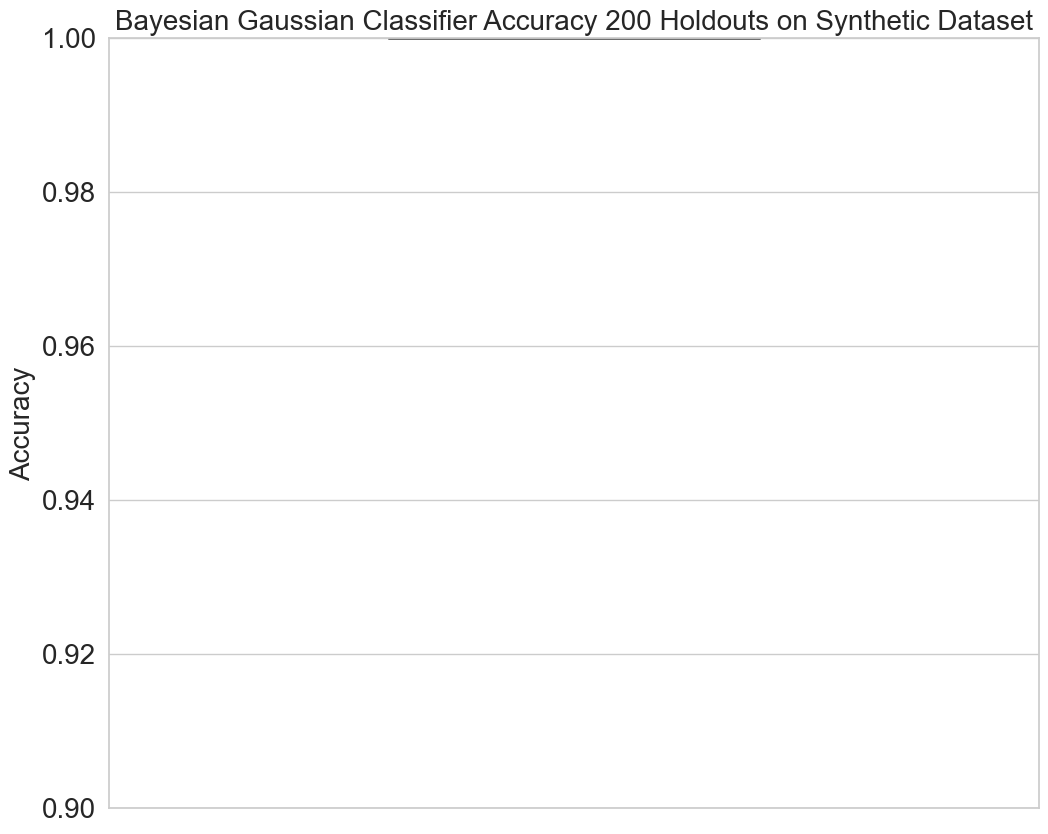

In [74]:
image_generator.create_boxplot(
    vector_distribution=bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_2/synthetic_bayesian_accuracy_boxplot.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [75]:
max_accuracy = bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = bayesian_df_results[
    bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = bayesian_df_results.loc[index_selected, "train_indexes"]
best_accuracy_test_indexes = bayesian_df_results.loc[index_selected, "test_indexes"]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=synthetic_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Índice selecionado aleatoriamente: 24
Acurácia do índice selecionado: 100.00%


# Resgatando a matriz de confusão e plotando ela

In [76]:
confusion_matrix_result = bayesian_df_results.loc[index_selected, "confusion_matrix"]

In [77]:
confusion_matrix_result

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 14]])

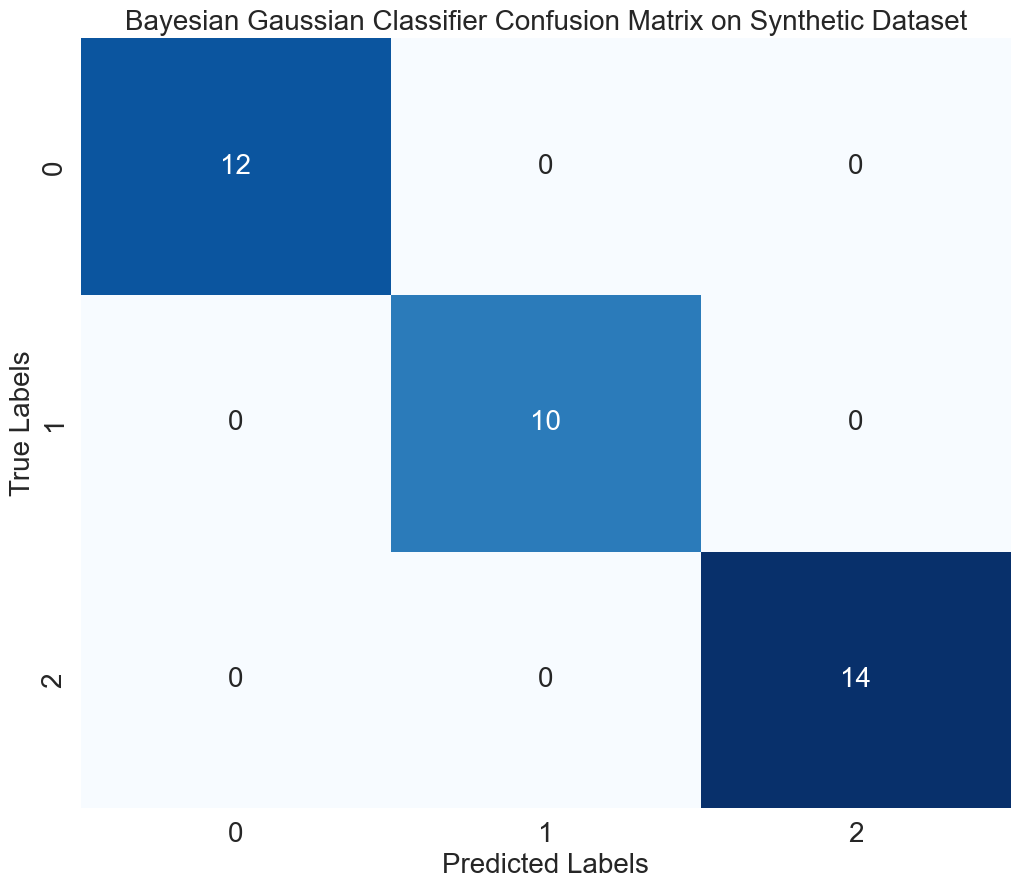

In [78]:
image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_2/synthetic_bayesian_confusion_matrix.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Bayesiano baseado em duas features

In [79]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = BayesianGaussianClassifier()
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Bayesiano

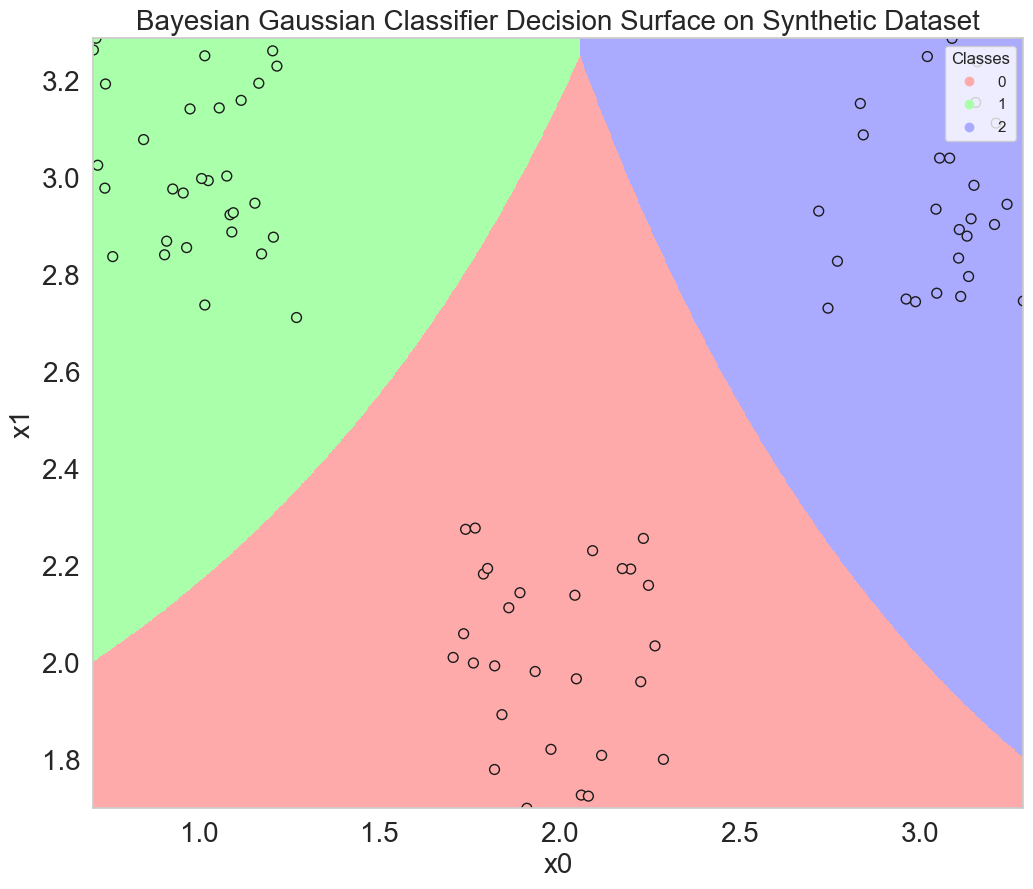

In [80]:
image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save="../../data/images/atividade_2/synthetic_bayesian_decision_surface.jpeg",
    show=True,
)